# The Sparks Foundation

## Task: Prediction using Decision tree algorithm

### By Nikhil Namboodiri

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline

In [3]:
#creating dataframe from dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#displaying information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#describing the dataframe
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#creating dataframe of features and labels
data = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]

In [7]:
#determining correlation
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


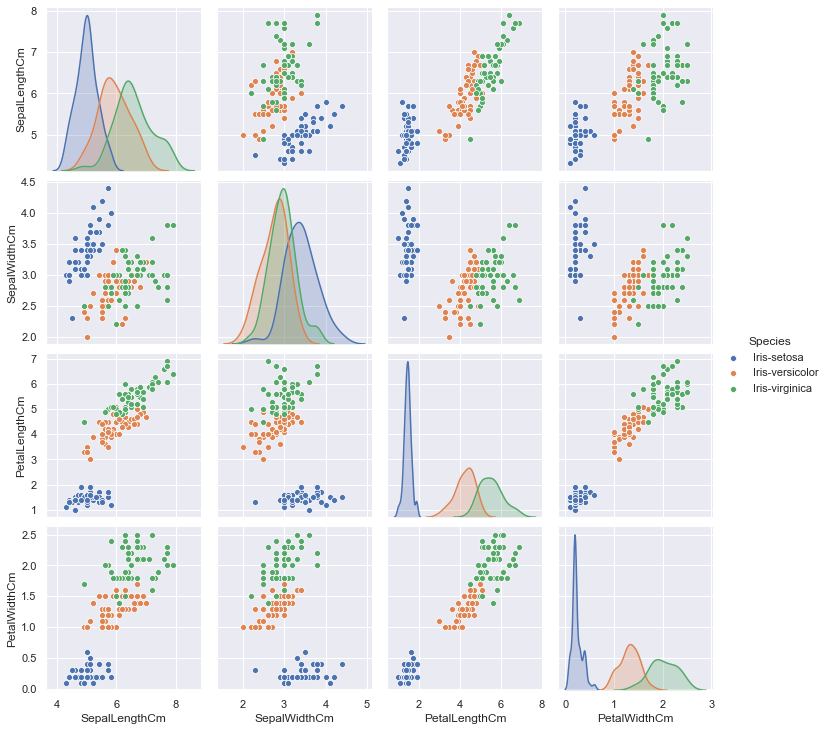

In [8]:
#visualising pairplot 
sns.pairplot(data,hue='Species')

In [9]:
#features
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
#labels
y = df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
#training the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
#fitting the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
#predicting the model
y_pred = dtree.predict(X_test)

In [16]:
#performance metrics
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
#confusion matrix
df1 = pd.DataFrame(confusion_matrix(y_test,y_pred),index=['Iris-Setosa','Iris-Versicolor','Iris-Virginica'],columns=['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
print("Confusion Matrix:")
df1

Confusion Matrix:


,Iris-Setosa,Iris-Versicolor,Iris-Virginica
Iris-Setosa,19,0,0
Iris-Versicolor,0,13,0
Iris-Virginica,0,0,13


In [18]:
#classification report
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



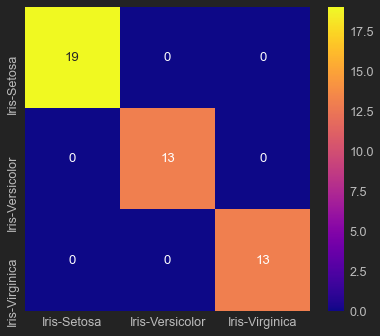

In [19]:
#visualising heatmap
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
sns.heatmap(df1,cmap='plasma',annot=True,linecolor='r')

In [20]:
#visualising the decision tree 
import graphviz

In [21]:
from sklearn import tree
dot_data = tree.export_graphviz(dtree,out_file=None,
                               feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
                               class_names='Species',
                               filled = True)
graph = graphviz.Source(dot_data,format='png')

In [22]:
from graphviz import Source
from IPython.display import SVG

In [23]:
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

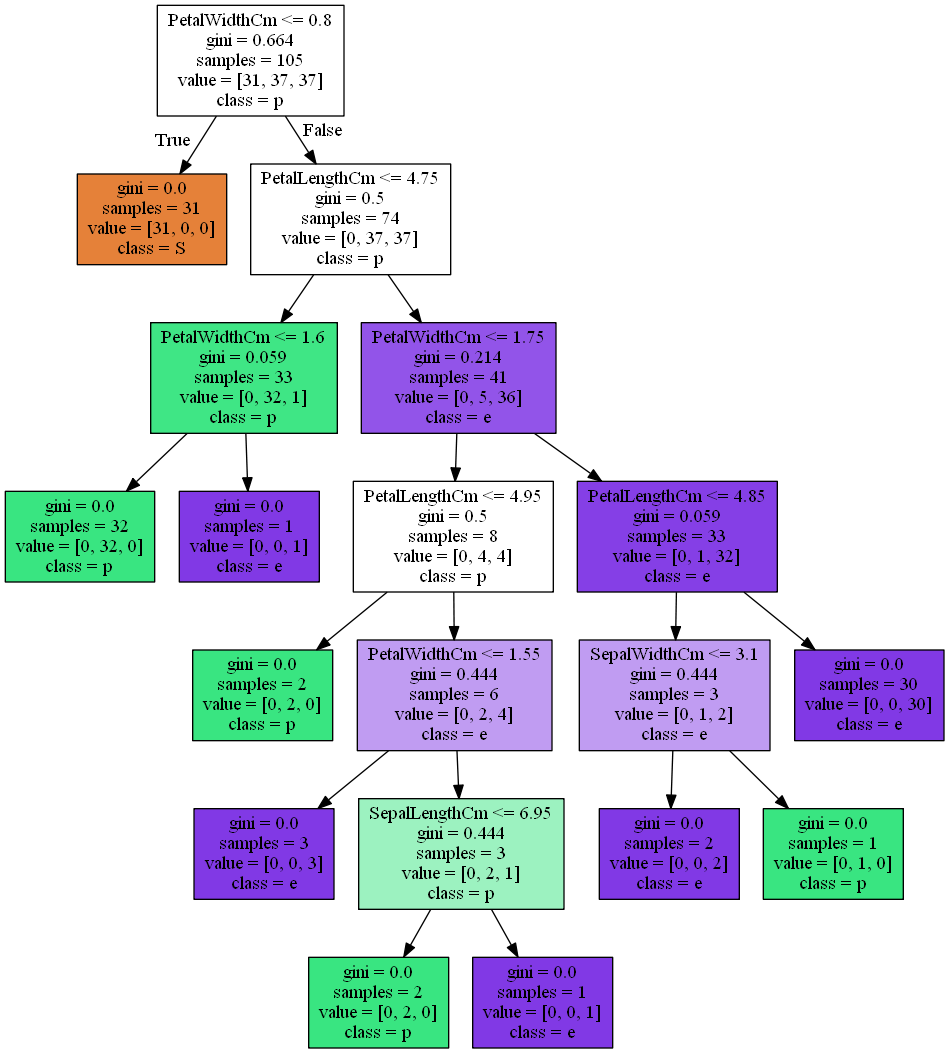

In [24]:
from IPython.display import Image
Image(png_bytes)